# Photo Quality


Use the "Run" button to execute the code.

# Installing Libaries and downloading dataset

In [154]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib 
import os
%matplotlib inline

In [155]:
pd.set_option('display.max_columns' ,None)
pd.set_option('display.max_rows' , 150) 
sns.set_style('darkgrid') 
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

# Exploring datasets

In [156]:
photo_df = pd.read_csv('training.csv')

In [157]:
test_df = pd.read_csv('test.csv')

In [158]:
photo_df

,id,latitude,longitude,width,height,size,name,description,caption,good
0,1,45,16,604,453,31,454 1659,NaN,NaN,1
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0
2,3,38,-97,720,540,71,802,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,919 1905 2088,1490 1644 919 1905 2088 1192 796,687 830 1017 990 2123 22 1309 1903 611 1304 12...,0
40258,40260,38,-120,604,453,4,1325 1348,2018 1426,1744 2015 658 164 54,0
40259,40261,29,-82,604,453,37,51 1829 367,NaN,786 830 1347 2057 792 1826 1716 1920 2041 171 ...,0
40260,40262,24,121,604,453,25,1443 1869,NaN,368 2029 1309 1573 755 370 1905 1823 916 740 1...,1


In [159]:
photo_df.dtypes

id              int64
latitude        int64
longitude       int64
width           int64
height          int64
size            int64
name           object
description    object
caption        object
good            int64
dtype: object

In [160]:
photo_df.shape

(40262, 10)

In [161]:
photo_df.drop(columns = ['name','description','caption'], inplace=True)

In [162]:
test_df.drop(columns = ['name','description','caption'], inplace=True)

In [163]:
photo_df.dtypes

id           int64
latitude     int64
longitude    int64
width        int64
height       int64
size         int64
good         int64
dtype: object

In [164]:
photo_df.describe()

,id,latitude,longitude,width,height,size,good
count,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000
mean,20132.204312,30.342854,-37.662213,587.654265,503.571581,39.872783,0.262133
std,11623.143325,20.503580,81.312267,108.089076,105.710218,42.195029,0.439800
min,1.000000,-55.000000,-175.000000,0.000000,0.000000,1.000000,0.000000
25%,10066.250000,24.000000,-98.000000,540.000000,453.000000,12.000000,0.000000
50%,20132.500000,37.000000,-76.000000,604.000000,453.000000,27.000000,0.000000
75%,30197.750000,42.000000,19.000000,640.000000,576.000000,55.000000,1.000000
max,40263.000000,72.000000,178.000000,720.000000,720.000000,1030.000000,1.000000


In [165]:
photo_df.dtypes

id           int64
latitude     int64
longitude    int64
width        int64
height       int64
size         int64
good         int64
dtype: object

In [166]:
test_df.dtypes

id           int64
latitude     int64
longitude    int64
width        int64
height       int64
size         int64
dtype: object

In [167]:
#re odering the train dataset
photos_df = photo_df[['id','latitude','longitude','width','height','size','good']]

# Missing Values and Scaling

In [168]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [169]:
photos_df.isna().sum()

id           0
latitude     0
longitude    0
width        0
height       0
size         0
good         0
dtype: int64

In [170]:
test_df.isna().sum()

id           0
latitude     0
longitude    0
width        0
height       0
size         0
dtype: int64

In [171]:
photos_df

,id,latitude,longitude,width,height,size,good
0,1,45,16,604,453,31,1
1,2,21,-87,720,534,43,0
2,3,38,-97,720,540,71,0
3,4,38,-122,604,453,24,0
4,5,-29,24,720,540,13,0
...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,0
40258,40260,38,-120,604,453,4,0
40259,40261,29,-82,604,453,37,0
40260,40262,24,121,604,453,25,1


In [172]:
input_cols, target_col = photos_df.columns[1:-1], 'good'
inputs_df, targets = photos_df[input_cols].copy(), photos_df[target_col].copy()

In [173]:
numeric_train = photos_df[input_cols].select_dtypes(include=np.number).columns.tolist()
numeric_test = photos_df[input_cols].select_dtypes(include=np.number).columns.tolist()

In [174]:
# scaling train
imputer = SimpleImputer().fit(inputs_df[numeric_train])
inputs_df[numeric_train] = imputer.transform(inputs_df[numeric_train])
scaler = RobustScaler().fit(inputs_df[numeric_train])
inputs_df[numeric_train] = scaler.transform(inputs_df[numeric_train])
#scaling test
imputer = SimpleImputer().fit(inputs_df[numeric_test])
inputs_df[numeric_test] = imputer.transform(inputs_df[numeric_test])
scaler = RobustScaler().fit(inputs_df[numeric_test])
inputs_df[numeric_test] = scaler.transform(inputs_df[numeric_test])

In [175]:
inputs_df[numeric_train]

,latitude,longitude,width,height,size
0,0.444444,0.786325,0.00,0.000000,0.093023
1,-0.888889,-0.094017,1.16,0.658537,0.372093
2,0.055556,-0.179487,1.16,0.707317,1.023256
3,0.055556,-0.393162,0.00,0.000000,-0.069767
4,-3.666667,0.854701,1.16,0.707317,-0.325581
...,...,...,...,...,...
40257,0.111111,-0.008547,0.00,0.000000,-0.209302
40258,0.055556,-0.376068,0.00,0.000000,-0.534884
40259,-0.444444,-0.051282,0.00,0.000000,0.232558
40260,-0.722222,1.683761,0.00,0.000000,-0.046512


In [176]:
import pickle
pickle.dump(scaler,open('scaling.pkl', 'wb'))
pickle.dump(imputer,open('imputer.pkl', 'wb'))

In [177]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_train], targets, test_size=0.25, random_state=42)

In [178]:
scaled_test = inputs_df[numeric_test]

In [179]:
scaled_test.describe()

,latitude,longitude,width,height,size
count,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000
mean,-0.369841,0.327673,-0.163457,0.411151,0.299367
std,1.139088,0.694977,1.080891,0.859433,0.981280
min,-5.111111,-0.846154,-6.040000,-3.682927,-0.604651
25%,-0.722222,-0.188034,-0.640000,0.000000,-0.348837
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.277778,0.811966,0.360000,1.000000,0.651163
max,1.944444,2.170940,1.160000,2.170732,23.325581


# Visualization

In [180]:
# pip install plotly

In [181]:
import plotly.express as px

In [182]:
# px.histogram(photos_df, 
#              x='latitude', 
#              title='latitude vs. photo_quality', 
#              color=photos_df['good'])

In [183]:
# px.histogram(photos_df, 
#              x='longitude', 
#              title='longitude vs. photo_quality', 
#              color=photos_df['good'])

# Correlation Heat Map


Correlation heat map helps to kmow the correlaton between features. Correlation of 1 shows that features are perfectly correlated, correlation of -1 shows that features are inversely correlated (i.e as one goes up the other decreases) and a correlation of 0 shows that there is no correlstion between features
if we have two features with a very high correlation, one of them can be dropped to reduce noise.
Note that the dependent feature has to be dropped first

In [184]:
photos_df

,id,latitude,longitude,width,height,size,good
0,1,45,16,604,453,31,1
1,2,21,-87,720,534,43,0
2,3,38,-97,720,540,71,0
3,4,38,-122,604,453,24,0
4,5,-29,24,720,540,13,0
...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,0
40258,40260,38,-120,604,453,4,0
40259,40261,29,-82,604,453,37,0
40260,40262,24,121,604,453,25,1


In [185]:
corr = photos_df.iloc[:, :-1].corr() #remving the dependent feature i.e ['good']


<AxesSubplot:>

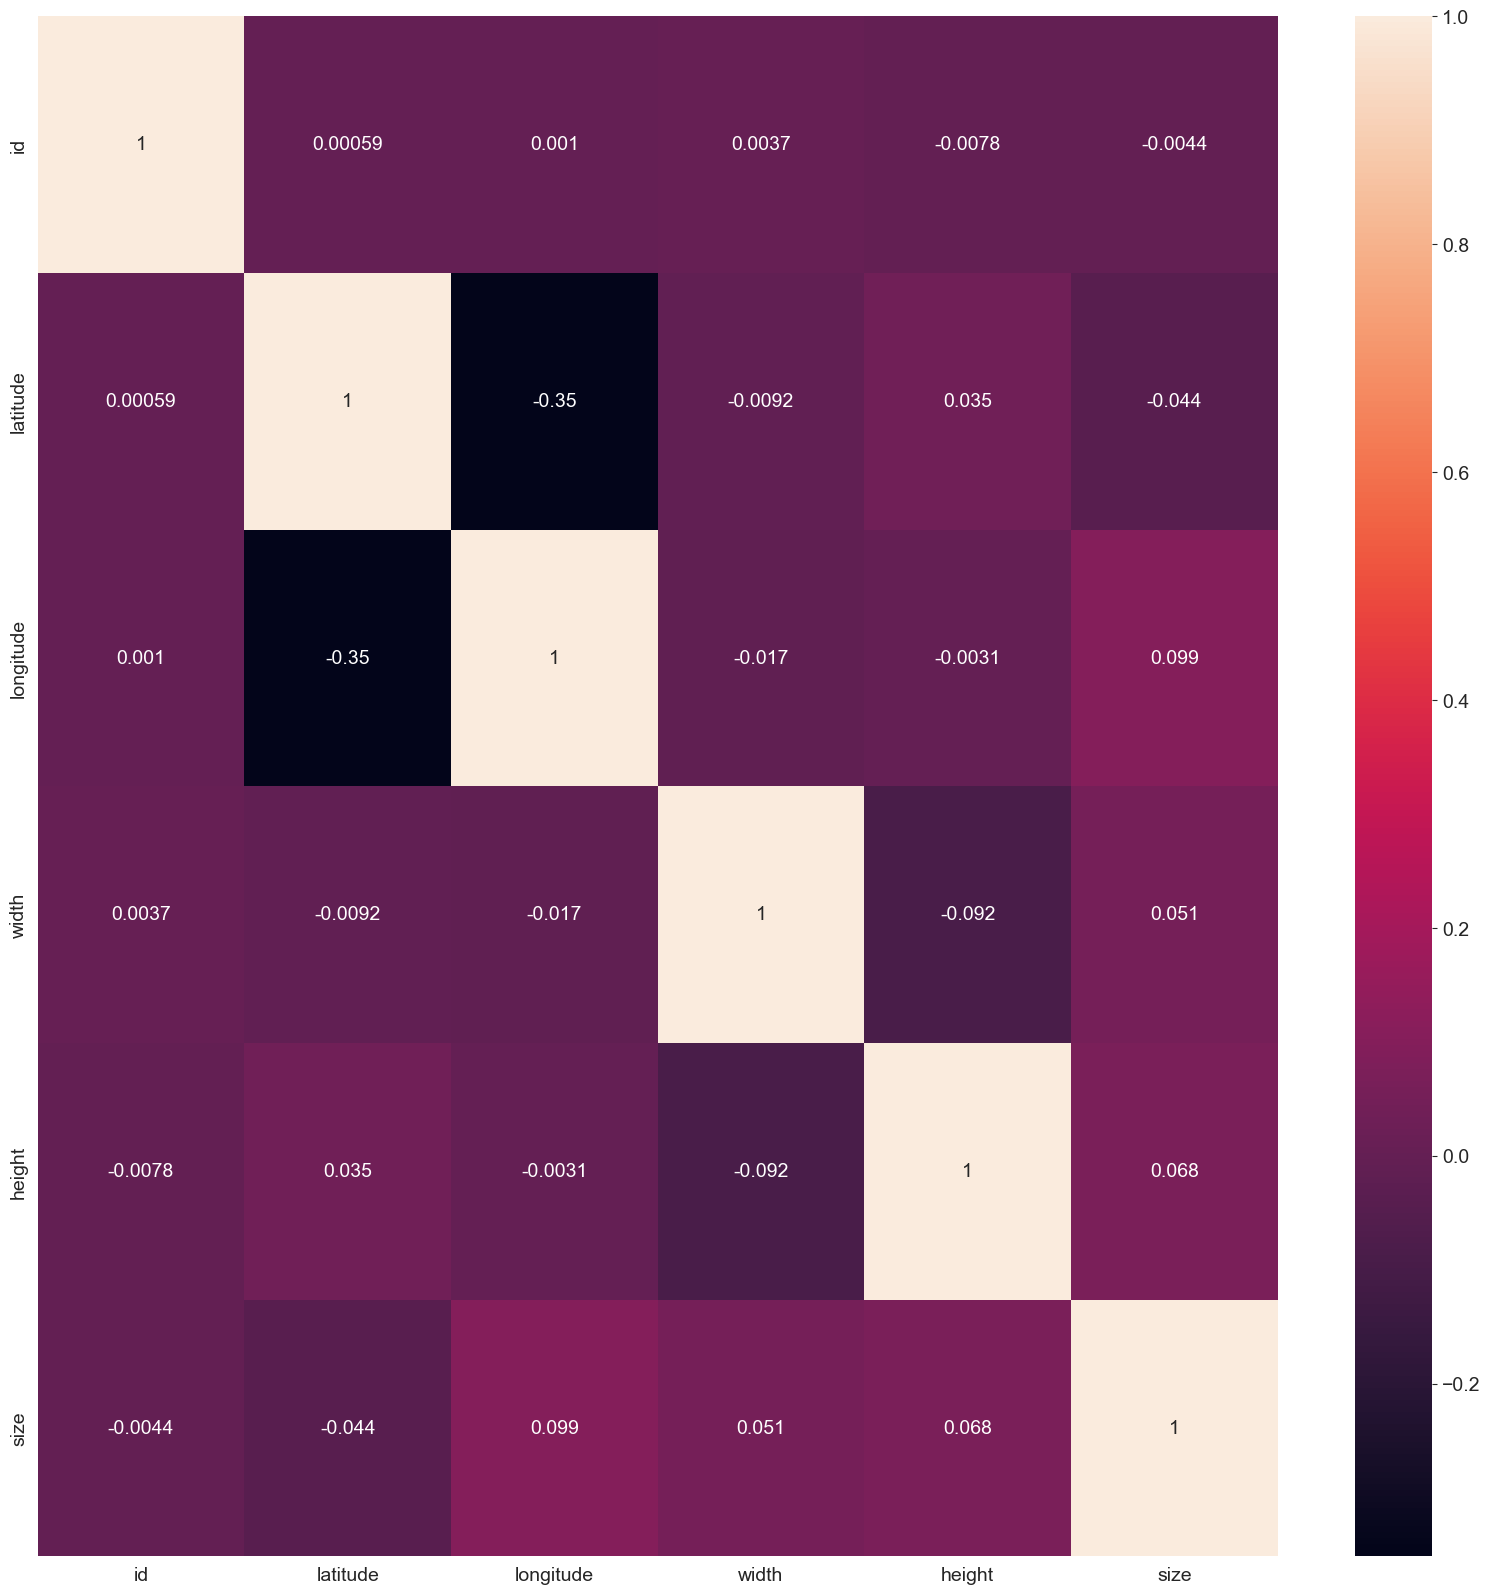

In [186]:
correlation = corr.index
plt.figure(figsize = (20, 20))
sns.heatmap(photos_df[correlation].corr(), annot = True)

From the heat map, we can see that the correlation between features are not too much, so there is no need to drop any feature

# RandomForestClassifier 

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
model1 = RandomForestClassifier()

In [189]:
%%time
model1.fit(train_inputs,train_targets)

Wall time: 4.24 s


RandomForestClassifier()

In [190]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model1.feature_importances_
}).sort_values('importance', ascending=False)

In [191]:
importance_df.head(10)

,feature,importance
4,size,0.367468
1,longitude,0.219780
0,latitude,0.175969
3,height,0.147686
2,width,0.089098


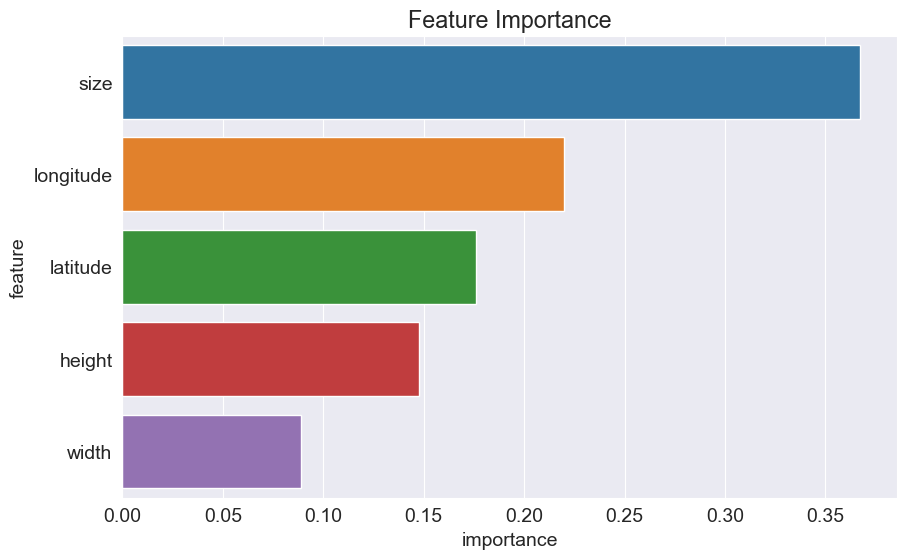

In [192]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Size seems to be the most important feature

In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [194]:
# def predict_and_plot(inputs, targets, name=''):
#     preds = model1.predict(inputs)
    
#     accuracy = accuracy_score(targets, preds)
#     print("Accuracy: {:.2f}%".format(accuracy * 100))
    
#     cf = confusion_matrix(targets, preds, normalize='true')
#     plt.figure()
#     sns.heatmap(cf, annot=True)
#     plt.xlabel('Prediction')
#     plt.ylabel('Target')
#     plt.title('{} Confusion Matrix'.format(name));
    
#     return preds

In [195]:
# train_preds = predict_and_plot(train_inputs, train_targets, 'Training')

In [196]:
# test_preds = predict_and_plot(val_inputs, val_targets, 'validation')

In [197]:
model1.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=710301088)

In [198]:
from sklearn.tree import plot_tree, export_text

In [199]:
# plt.figure(figsize=(80,20))
# plot_tree(model1.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True);

In [200]:
scaled_test.columns

Index(['latitude', 'longitude', 'width', 'height', 'size'], dtype='object')

In [201]:
test_pred = model1.predict_proba(scaled_test)
random_forest_pred = pd.DataFrame(test_pred)
random_forest_pred.columns = ['No', 'Yes']
random_forest_pred


,No,Yes
0,0.165000,0.835000
1,0.300000,0.700000
2,0.970000,0.030000
3,0.895861,0.104139
4,0.904333,0.095667
...,...,...
40257,1.000000,0.000000
40258,0.970000,0.030000
40259,0.990000,0.010000
40260,0.548833,0.451167


In [202]:
# !pip install xgboost

# Catboost

In [203]:
# pip install catboost

In [204]:
# pip install --upgrade pip

In [205]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier


In [206]:
model3 = CatBoostClassifier() 

In [207]:
%%time
model3.fit(train_inputs,train_targets)

Learning rate set to 0.044144
0:	learn: 0.6777115	total: 467ms	remaining: 7m 46s
1:	learn: 0.6636177	total: 489ms	remaining: 4m 3s
2:	learn: 0.6513314	total: 509ms	remaining: 2m 49s
3:	learn: 0.6397389	total: 527ms	remaining: 2m 11s
4:	learn: 0.6293948	total: 569ms	remaining: 1m 53s
5:	learn: 0.6200979	total: 586ms	remaining: 1m 37s
6:	learn: 0.6114865	total: 600ms	remaining: 1m 25s
7:	learn: 0.6038525	total: 616ms	remaining: 1m 16s
8:	learn: 0.5966716	total: 629ms	remaining: 1m 9s
9:	learn: 0.5901235	total: 706ms	remaining: 1m 9s
10:	learn: 0.5842864	total: 725ms	remaining: 1m 5s
11:	learn: 0.5790882	total: 745ms	remaining: 1m 1s
12:	learn: 0.5744830	total: 798ms	remaining: 1m
13:	learn: 0.5704728	total: 813ms	remaining: 57.3s
14:	learn: 0.5664879	total: 829ms	remaining: 54.4s
15:	learn: 0.5627444	total: 891ms	remaining: 54.8s
16:	learn: 0.5590319	total: 906ms	remaining: 52.4s
17:	learn: 0.5559743	total: 929ms	remaining: 50.7s
18:	learn: 0.5530383	total: 947ms	remaining: 48.9s
19:	lea

163:	learn: 0.5036027	total: 3.77s	remaining: 19.2s
164:	learn: 0.5035434	total: 3.82s	remaining: 19.3s
165:	learn: 0.5034369	total: 3.87s	remaining: 19.5s
166:	learn: 0.5033923	total: 3.9s	remaining: 19.5s
167:	learn: 0.5032817	total: 3.95s	remaining: 19.5s
168:	learn: 0.5031823	total: 4.01s	remaining: 19.7s
169:	learn: 0.5031307	total: 4.05s	remaining: 19.8s
170:	learn: 0.5030607	total: 4.1s	remaining: 19.9s
171:	learn: 0.5029445	total: 4.17s	remaining: 20.1s
172:	learn: 0.5028876	total: 4.23s	remaining: 20.2s
173:	learn: 0.5028342	total: 4.32s	remaining: 20.5s
174:	learn: 0.5027544	total: 4.37s	remaining: 20.6s
175:	learn: 0.5026522	total: 4.45s	remaining: 20.8s
176:	learn: 0.5025303	total: 4.49s	remaining: 20.9s
177:	learn: 0.5024438	total: 4.54s	remaining: 20.9s
178:	learn: 0.5023777	total: 4.58s	remaining: 21s
179:	learn: 0.5023401	total: 4.62s	remaining: 21s
180:	learn: 0.5023066	total: 4.66s	remaining: 21.1s
181:	learn: 0.5022202	total: 4.71s	remaining: 21.2s
182:	learn: 0.5021

331:	learn: 0.4916221	total: 7.78s	remaining: 15.6s
332:	learn: 0.4915915	total: 7.79s	remaining: 15.6s
333:	learn: 0.4915051	total: 7.8s	remaining: 15.6s
334:	learn: 0.4914449	total: 7.82s	remaining: 15.5s
335:	learn: 0.4913919	total: 7.83s	remaining: 15.5s
336:	learn: 0.4913222	total: 7.84s	remaining: 15.4s
337:	learn: 0.4912600	total: 7.85s	remaining: 15.4s
338:	learn: 0.4912259	total: 7.87s	remaining: 15.3s
339:	learn: 0.4911528	total: 7.88s	remaining: 15.3s
340:	learn: 0.4910619	total: 7.89s	remaining: 15.3s
341:	learn: 0.4910003	total: 7.91s	remaining: 15.2s
342:	learn: 0.4909411	total: 7.92s	remaining: 15.2s
343:	learn: 0.4909176	total: 7.93s	remaining: 15.1s
344:	learn: 0.4908531	total: 7.94s	remaining: 15.1s
345:	learn: 0.4907984	total: 7.96s	remaining: 15s
346:	learn: 0.4907178	total: 7.97s	remaining: 15s
347:	learn: 0.4906507	total: 7.99s	remaining: 15s
348:	learn: 0.4905921	total: 8s	remaining: 14.9s
349:	learn: 0.4905298	total: 8.01s	remaining: 14.9s
350:	learn: 0.4904660	

490:	learn: 0.4823261	total: 9.9s	remaining: 10.3s
491:	learn: 0.4822528	total: 9.91s	remaining: 10.2s
492:	learn: 0.4822130	total: 9.93s	remaining: 10.2s
493:	learn: 0.4822078	total: 9.94s	remaining: 10.2s
494:	learn: 0.4821346	total: 9.96s	remaining: 10.2s
495:	learn: 0.4820637	total: 9.97s	remaining: 10.1s
496:	learn: 0.4820248	total: 9.99s	remaining: 10.1s
497:	learn: 0.4819864	total: 10s	remaining: 10.1s
498:	learn: 0.4819361	total: 10s	remaining: 10.1s
499:	learn: 0.4819038	total: 10s	remaining: 10s
500:	learn: 0.4818506	total: 10s	remaining: 10s
501:	learn: 0.4818224	total: 10.1s	remaining: 9.98s
502:	learn: 0.4817435	total: 10.1s	remaining: 9.96s
503:	learn: 0.4817194	total: 10.1s	remaining: 9.94s
504:	learn: 0.4816714	total: 10.1s	remaining: 9.91s
505:	learn: 0.4816441	total: 10.1s	remaining: 9.89s
506:	learn: 0.4815926	total: 10.1s	remaining: 9.87s
507:	learn: 0.4815457	total: 10.2s	remaining: 9.84s
508:	learn: 0.4814640	total: 10.2s	remaining: 9.81s
509:	learn: 0.4813972	tot

663:	learn: 0.4737364	total: 12.3s	remaining: 6.2s
664:	learn: 0.4736861	total: 12.3s	remaining: 6.18s
665:	learn: 0.4736361	total: 12.3s	remaining: 6.16s
666:	learn: 0.4735829	total: 12.3s	remaining: 6.14s
667:	learn: 0.4735218	total: 12.3s	remaining: 6.12s
668:	learn: 0.4735021	total: 12.3s	remaining: 6.1s
669:	learn: 0.4734621	total: 12.3s	remaining: 6.08s
670:	learn: 0.4734152	total: 12.3s	remaining: 6.05s
671:	learn: 0.4733807	total: 12.4s	remaining: 6.03s
672:	learn: 0.4733520	total: 12.4s	remaining: 6.01s
673:	learn: 0.4732943	total: 12.4s	remaining: 5.99s
674:	learn: 0.4732387	total: 12.4s	remaining: 5.97s
675:	learn: 0.4731842	total: 12.4s	remaining: 5.95s
676:	learn: 0.4731031	total: 12.4s	remaining: 5.93s
677:	learn: 0.4731014	total: 12.4s	remaining: 5.91s
678:	learn: 0.4730500	total: 12.4s	remaining: 5.88s
679:	learn: 0.4729887	total: 12.5s	remaining: 5.86s
680:	learn: 0.4729377	total: 12.5s	remaining: 5.84s
681:	learn: 0.4728814	total: 12.5s	remaining: 5.82s
682:	learn: 0.

834:	learn: 0.4666020	total: 14.6s	remaining: 2.89s
835:	learn: 0.4665610	total: 14.7s	remaining: 2.88s
836:	learn: 0.4665293	total: 14.7s	remaining: 2.86s
837:	learn: 0.4664842	total: 14.7s	remaining: 2.84s
838:	learn: 0.4664353	total: 14.7s	remaining: 2.82s
839:	learn: 0.4663912	total: 14.7s	remaining: 2.8s
840:	learn: 0.4663896	total: 14.7s	remaining: 2.78s
841:	learn: 0.4663356	total: 14.7s	remaining: 2.77s
842:	learn: 0.4662925	total: 14.8s	remaining: 2.75s
843:	learn: 0.4662511	total: 14.8s	remaining: 2.73s
844:	learn: 0.4661893	total: 14.8s	remaining: 2.71s
845:	learn: 0.4661541	total: 14.8s	remaining: 2.69s
846:	learn: 0.4660983	total: 14.8s	remaining: 2.67s
847:	learn: 0.4660620	total: 14.8s	remaining: 2.66s
848:	learn: 0.4660344	total: 14.8s	remaining: 2.64s
849:	learn: 0.4660100	total: 14.8s	remaining: 2.62s
850:	learn: 0.4659663	total: 14.9s	remaining: 2.6s
851:	learn: 0.4659322	total: 14.9s	remaining: 2.58s
852:	learn: 0.4658898	total: 14.9s	remaining: 2.57s
853:	learn: 0.

Wall time: 19.7 s


In [208]:
# def predict_and_plot(inputs, targets, name=''):
#     preds = model3.predict(inputs)
    
#     accuracy = accuracy_score(targets, preds)
#     print("Accuracy: {:.2f}%".format(accuracy * 100))
    
#     cf = confusion_matrix(targets, preds, normalize='true')
#     plt.figure()
#     sns.heatmap(cf, annot=True)
#     plt.xlabel('Prediction')
#     plt.ylabel('Target')
#     plt.title('{} Confusion Matrix'.format(name));
    
#     return preds

In [209]:
# train_pred = predict_and_plot(train_inputs, train_targets, 'Training')

In [210]:
# test_pred = predict_and_plot(val_inputs, val_targets, 'validation')

# Hyperparameter tuning (catboost)

In [211]:
# def test_params(**params):
#     model = CatBoostClassifier(**params).fit(train_inputs, train_targets)
#     train_acc = accuracy_score(model.predict(train_inputs), train_targets)
#     test_acc = accuracy_score(model.predict(val_inputs), val_targets)
#     return train_acc, test_acc

In [212]:
# test_params(n_estimators=20, max_depth=7)

In [213]:
# def test_param_and_plot(param_name, param_values):
#     train_accs, val_accs = [], [] 
#     for value in param_values:
#         params = {param_name: value}
#         train_acc, val_acc = test_params(**params)
#         train_accs.append(train_acc)
#         val_accs.append(val_acc)
#     plt.figure(figsize=(10,6))
#     plt.title('Overfitting curve: ' + param_name)
#     plt.plot(param_values, train_accs, 'b-o')
#     plt.plot(param_values, val_accs, 'r-o')
#     plt.xlabel(param_name)
#     plt.ylabel('accuracy')
#     plt.legend(['Training', 'Validation'])

In [214]:
#  test_param_and_plot('learning_rate', [0.04, 0.05,0.06,0.07])

0.040 seems to be the best learning rate for validation accuracy

In [215]:
#  test_param_and_plot('depth', [5, 9, 10])

As the learning rate increases, the accuracy of train predictions increases (overfitting), whilst the validation accuracy remains almost the same

In [216]:
#  test_param_and_plot('n_estimators', [6500,7000])

In [217]:
# test_param_and_plot('random_state', [1500,2000,2500])

In [218]:
#Applying the hyperparameters
model = CatBoostClassifier(random_state = 2000, n_estimators = 6000, max_depth = 7,learning_rate =0.04)
model.fit(train_inputs,train_targets)

0:	learn: 0.6788995	total: 25.1ms	remaining: 2m 30s
1:	learn: 0.6661433	total: 48.1ms	remaining: 2m 24s
2:	learn: 0.6545344	total: 73.6ms	remaining: 2m 27s
3:	learn: 0.6440965	total: 96.2ms	remaining: 2m 24s
4:	learn: 0.6342186	total: 119ms	remaining: 2m 22s
5:	learn: 0.6251525	total: 143ms	remaining: 2m 22s
6:	learn: 0.6166417	total: 166ms	remaining: 2m 22s
7:	learn: 0.6093015	total: 191ms	remaining: 2m 23s
8:	learn: 0.6021686	total: 213ms	remaining: 2m 21s
9:	learn: 0.5950904	total: 235ms	remaining: 2m 20s
10:	learn: 0.5889445	total: 257ms	remaining: 2m 20s
11:	learn: 0.5838055	total: 278ms	remaining: 2m 18s
12:	learn: 0.5787443	total: 301ms	remaining: 2m 18s
13:	learn: 0.5743682	total: 325ms	remaining: 2m 19s
14:	learn: 0.5701516	total: 348ms	remaining: 2m 18s
15:	learn: 0.5664090	total: 370ms	remaining: 2m 18s
16:	learn: 0.5630871	total: 395ms	remaining: 2m 18s
17:	learn: 0.5598623	total: 418ms	remaining: 2m 18s
18:	learn: 0.5568875	total: 441ms	remaining: 2m 18s
19:	learn: 0.55421

168:	learn: 0.4997390	total: 4.5s	remaining: 2m 35s
169:	learn: 0.4996622	total: 4.51s	remaining: 2m 34s
170:	learn: 0.4996332	total: 4.53s	remaining: 2m 34s
171:	learn: 0.4995284	total: 4.55s	remaining: 2m 34s
172:	learn: 0.4994651	total: 4.58s	remaining: 2m 34s
173:	learn: 0.4994086	total: 4.6s	remaining: 2m 33s
174:	learn: 0.4992737	total: 4.62s	remaining: 2m 33s
175:	learn: 0.4991874	total: 4.64s	remaining: 2m 33s
176:	learn: 0.4991283	total: 4.66s	remaining: 2m 33s
177:	learn: 0.4990263	total: 4.68s	remaining: 2m 32s
178:	learn: 0.4989774	total: 4.7s	remaining: 2m 32s
179:	learn: 0.4988597	total: 4.72s	remaining: 2m 32s
180:	learn: 0.4987946	total: 4.74s	remaining: 2m 32s
181:	learn: 0.4987196	total: 4.76s	remaining: 2m 32s
182:	learn: 0.4986066	total: 4.78s	remaining: 2m 31s
183:	learn: 0.4985182	total: 4.8s	remaining: 2m 31s
184:	learn: 0.4984835	total: 4.82s	remaining: 2m 31s
185:	learn: 0.4984248	total: 4.84s	remaining: 2m 31s
186:	learn: 0.4983599	total: 4.86s	remaining: 2m 3

331:	learn: 0.4874605	total: 8.23s	remaining: 2m 20s
332:	learn: 0.4874005	total: 8.25s	remaining: 2m 20s
333:	learn: 0.4873847	total: 8.27s	remaining: 2m 20s
334:	learn: 0.4872576	total: 8.29s	remaining: 2m 20s
335:	learn: 0.4871889	total: 8.31s	remaining: 2m 20s
336:	learn: 0.4871087	total: 8.33s	remaining: 2m 19s
337:	learn: 0.4870008	total: 8.35s	remaining: 2m 19s
338:	learn: 0.4869200	total: 8.37s	remaining: 2m 19s
339:	learn: 0.4868352	total: 8.39s	remaining: 2m 19s
340:	learn: 0.4867543	total: 8.4s	remaining: 2m 19s
341:	learn: 0.4866401	total: 8.42s	remaining: 2m 19s
342:	learn: 0.4865752	total: 8.44s	remaining: 2m 19s
343:	learn: 0.4864720	total: 8.46s	remaining: 2m 19s
344:	learn: 0.4863670	total: 8.48s	remaining: 2m 19s
345:	learn: 0.4862519	total: 8.5s	remaining: 2m 18s
346:	learn: 0.4861966	total: 8.52s	remaining: 2m 18s
347:	learn: 0.4861184	total: 8.54s	remaining: 2m 18s
348:	learn: 0.4860564	total: 8.56s	remaining: 2m 18s
349:	learn: 0.4859698	total: 8.58s	remaining: 2m

495:	learn: 0.4768070	total: 12.2s	remaining: 2m 15s
496:	learn: 0.4767507	total: 12.2s	remaining: 2m 15s
497:	learn: 0.4766988	total: 12.2s	remaining: 2m 15s
498:	learn: 0.4766189	total: 12.3s	remaining: 2m 15s
499:	learn: 0.4765296	total: 12.3s	remaining: 2m 14s
500:	learn: 0.4764538	total: 12.3s	remaining: 2m 14s
501:	learn: 0.4764137	total: 12.3s	remaining: 2m 14s
502:	learn: 0.4763241	total: 12.3s	remaining: 2m 14s
503:	learn: 0.4762447	total: 12.4s	remaining: 2m 14s
504:	learn: 0.4761870	total: 12.4s	remaining: 2m 14s
505:	learn: 0.4761493	total: 12.4s	remaining: 2m 14s
506:	learn: 0.4761040	total: 12.4s	remaining: 2m 14s
507:	learn: 0.4760406	total: 12.5s	remaining: 2m 14s
508:	learn: 0.4759851	total: 12.5s	remaining: 2m 14s
509:	learn: 0.4759489	total: 12.5s	remaining: 2m 14s
510:	learn: 0.4758652	total: 12.6s	remaining: 2m 14s
511:	learn: 0.4757873	total: 12.6s	remaining: 2m 15s
512:	learn: 0.4757597	total: 12.6s	remaining: 2m 15s
513:	learn: 0.4756704	total: 12.7s	remaining: 

659:	learn: 0.4673236	total: 16.7s	remaining: 2m 15s
660:	learn: 0.4673199	total: 16.7s	remaining: 2m 15s
661:	learn: 0.4673167	total: 16.8s	remaining: 2m 15s
662:	learn: 0.4672649	total: 16.8s	remaining: 2m 15s
663:	learn: 0.4672432	total: 16.8s	remaining: 2m 15s
664:	learn: 0.4671963	total: 16.8s	remaining: 2m 15s
665:	learn: 0.4671356	total: 16.9s	remaining: 2m 15s
666:	learn: 0.4670646	total: 16.9s	remaining: 2m 15s
667:	learn: 0.4670200	total: 16.9s	remaining: 2m 14s
668:	learn: 0.4669545	total: 16.9s	remaining: 2m 14s
669:	learn: 0.4668834	total: 17s	remaining: 2m 14s
670:	learn: 0.4668207	total: 17s	remaining: 2m 14s
671:	learn: 0.4667503	total: 17s	remaining: 2m 14s
672:	learn: 0.4667195	total: 17s	remaining: 2m 14s
673:	learn: 0.4666378	total: 17s	remaining: 2m 14s
674:	learn: 0.4666049	total: 17.1s	remaining: 2m 14s
675:	learn: 0.4665521	total: 17.1s	remaining: 2m 14s
676:	learn: 0.4664703	total: 17.1s	remaining: 2m 14s
677:	learn: 0.4663786	total: 17.1s	remaining: 2m 14s
678

817:	learn: 0.4592731	total: 20.3s	remaining: 2m 8s
818:	learn: 0.4592244	total: 20.3s	remaining: 2m 8s
819:	learn: 0.4591721	total: 20.4s	remaining: 2m 8s
820:	learn: 0.4591252	total: 20.4s	remaining: 2m 8s
821:	learn: 0.4590655	total: 20.4s	remaining: 2m 8s
822:	learn: 0.4590155	total: 20.4s	remaining: 2m 8s
823:	learn: 0.4589728	total: 20.4s	remaining: 2m 8s
824:	learn: 0.4589134	total: 20.5s	remaining: 2m 8s
825:	learn: 0.4588430	total: 20.5s	remaining: 2m 8s
826:	learn: 0.4587908	total: 20.5s	remaining: 2m 8s
827:	learn: 0.4587182	total: 20.5s	remaining: 2m 8s
828:	learn: 0.4586544	total: 20.5s	remaining: 2m 8s
829:	learn: 0.4586039	total: 20.5s	remaining: 2m 7s
830:	learn: 0.4585650	total: 20.6s	remaining: 2m 7s
831:	learn: 0.4584775	total: 20.6s	remaining: 2m 7s
832:	learn: 0.4584345	total: 20.6s	remaining: 2m 7s
833:	learn: 0.4583934	total: 20.6s	remaining: 2m 7s
834:	learn: 0.4583291	total: 20.6s	remaining: 2m 7s
835:	learn: 0.4582858	total: 20.7s	remaining: 2m 7s
836:	learn: 

983:	learn: 0.4513938	total: 24s	remaining: 2m 2s
984:	learn: 0.4513411	total: 24.1s	remaining: 2m 2s
985:	learn: 0.4512844	total: 24.1s	remaining: 2m 2s
986:	learn: 0.4512295	total: 24.1s	remaining: 2m 2s
987:	learn: 0.4512095	total: 24.1s	remaining: 2m 2s
988:	learn: 0.4512072	total: 24.1s	remaining: 2m 2s
989:	learn: 0.4511525	total: 24.2s	remaining: 2m 2s
990:	learn: 0.4510812	total: 24.2s	remaining: 2m 2s
991:	learn: 0.4510363	total: 24.2s	remaining: 2m 2s
992:	learn: 0.4509683	total: 24.2s	remaining: 2m 2s
993:	learn: 0.4509225	total: 24.2s	remaining: 2m 2s
994:	learn: 0.4508913	total: 24.3s	remaining: 2m 1s
995:	learn: 0.4508302	total: 24.3s	remaining: 2m 1s
996:	learn: 0.4507807	total: 24.3s	remaining: 2m 1s
997:	learn: 0.4507596	total: 24.3s	remaining: 2m 1s
998:	learn: 0.4507417	total: 24.3s	remaining: 2m 1s
999:	learn: 0.4506511	total: 24.3s	remaining: 2m 1s
1000:	learn: 0.4506072	total: 24.4s	remaining: 2m 1s
1001:	learn: 0.4505594	total: 24.4s	remaining: 2m 1s
1002:	learn:

1145:	learn: 0.4443027	total: 27.3s	remaining: 1m 55s
1146:	learn: 0.4442857	total: 27.4s	remaining: 1m 55s
1147:	learn: 0.4442836	total: 27.4s	remaining: 1m 55s
1148:	learn: 0.4442693	total: 27.4s	remaining: 1m 55s
1149:	learn: 0.4442254	total: 27.4s	remaining: 1m 55s
1150:	learn: 0.4441794	total: 27.4s	remaining: 1m 55s
1151:	learn: 0.4441302	total: 27.5s	remaining: 1m 55s
1152:	learn: 0.4441116	total: 27.5s	remaining: 1m 55s
1153:	learn: 0.4440627	total: 27.5s	remaining: 1m 55s
1154:	learn: 0.4440182	total: 27.5s	remaining: 1m 55s
1155:	learn: 0.4439774	total: 27.6s	remaining: 1m 55s
1156:	learn: 0.4439259	total: 27.6s	remaining: 1m 55s
1157:	learn: 0.4438776	total: 27.6s	remaining: 1m 55s
1158:	learn: 0.4438213	total: 27.6s	remaining: 1m 55s
1159:	learn: 0.4438108	total: 27.7s	remaining: 1m 55s
1160:	learn: 0.4437762	total: 27.7s	remaining: 1m 55s
1161:	learn: 0.4437229	total: 27.7s	remaining: 1m 55s
1162:	learn: 0.4436488	total: 27.8s	remaining: 1m 55s
1163:	learn: 0.4435998	total

1300:	learn: 0.4384677	total: 31.1s	remaining: 1m 52s
1301:	learn: 0.4384248	total: 31.1s	remaining: 1m 52s
1302:	learn: 0.4383951	total: 31.2s	remaining: 1m 52s
1303:	learn: 0.4383512	total: 31.2s	remaining: 1m 52s
1304:	learn: 0.4383154	total: 31.2s	remaining: 1m 52s
1305:	learn: 0.4383015	total: 31.2s	remaining: 1m 52s
1306:	learn: 0.4382585	total: 31.3s	remaining: 1m 52s
1307:	learn: 0.4382201	total: 31.3s	remaining: 1m 52s
1308:	learn: 0.4382040	total: 31.3s	remaining: 1m 52s
1309:	learn: 0.4381634	total: 31.3s	remaining: 1m 52s
1310:	learn: 0.4381299	total: 31.4s	remaining: 1m 52s
1311:	learn: 0.4380696	total: 31.4s	remaining: 1m 52s
1312:	learn: 0.4380115	total: 31.4s	remaining: 1m 52s
1313:	learn: 0.4379646	total: 31.4s	remaining: 1m 52s
1314:	learn: 0.4379343	total: 31.5s	remaining: 1m 52s
1315:	learn: 0.4378944	total: 31.5s	remaining: 1m 52s
1316:	learn: 0.4378265	total: 31.5s	remaining: 1m 52s
1317:	learn: 0.4377759	total: 31.5s	remaining: 1m 52s
1318:	learn: 0.4377283	total

1454:	learn: 0.4325807	total: 34.6s	remaining: 1m 48s
1455:	learn: 0.4325402	total: 34.6s	remaining: 1m 48s
1456:	learn: 0.4325292	total: 34.6s	remaining: 1m 47s
1457:	learn: 0.4325125	total: 34.7s	remaining: 1m 47s
1458:	learn: 0.4324670	total: 34.7s	remaining: 1m 47s
1459:	learn: 0.4324371	total: 34.7s	remaining: 1m 47s
1460:	learn: 0.4324041	total: 34.7s	remaining: 1m 47s
1461:	learn: 0.4323706	total: 34.7s	remaining: 1m 47s
1462:	learn: 0.4322943	total: 34.8s	remaining: 1m 47s
1463:	learn: 0.4322446	total: 34.8s	remaining: 1m 47s
1464:	learn: 0.4322031	total: 34.8s	remaining: 1m 47s
1465:	learn: 0.4321774	total: 34.8s	remaining: 1m 47s
1466:	learn: 0.4321557	total: 34.8s	remaining: 1m 47s
1467:	learn: 0.4321160	total: 34.9s	remaining: 1m 47s
1468:	learn: 0.4320827	total: 34.9s	remaining: 1m 47s
1469:	learn: 0.4320359	total: 34.9s	remaining: 1m 47s
1470:	learn: 0.4320039	total: 34.9s	remaining: 1m 47s
1471:	learn: 0.4319795	total: 34.9s	remaining: 1m 47s
1472:	learn: 0.4319602	total

1614:	learn: 0.4266786	total: 37.8s	remaining: 1m 42s
1615:	learn: 0.4266340	total: 37.8s	remaining: 1m 42s
1616:	learn: 0.4266051	total: 37.8s	remaining: 1m 42s
1617:	learn: 0.4265513	total: 37.9s	remaining: 1m 42s
1618:	learn: 0.4265159	total: 37.9s	remaining: 1m 42s
1619:	learn: 0.4264766	total: 37.9s	remaining: 1m 42s
1620:	learn: 0.4264382	total: 37.9s	remaining: 1m 42s
1621:	learn: 0.4263947	total: 37.9s	remaining: 1m 42s
1622:	learn: 0.4263211	total: 38s	remaining: 1m 42s
1623:	learn: 0.4262973	total: 38s	remaining: 1m 42s
1624:	learn: 0.4262489	total: 38s	remaining: 1m 42s
1625:	learn: 0.4262225	total: 38s	remaining: 1m 42s
1626:	learn: 0.4261695	total: 38s	remaining: 1m 42s
1627:	learn: 0.4261442	total: 38.1s	remaining: 1m 42s
1628:	learn: 0.4260870	total: 38.1s	remaining: 1m 42s
1629:	learn: 0.4260513	total: 38.1s	remaining: 1m 42s
1630:	learn: 0.4260228	total: 38.1s	remaining: 1m 42s
1631:	learn: 0.4260053	total: 38.1s	remaining: 1m 42s
1632:	learn: 0.4259750	total: 38.2s	re

1769:	learn: 0.4213961	total: 40.8s	remaining: 1m 37s
1770:	learn: 0.4213858	total: 40.9s	remaining: 1m 37s
1771:	learn: 0.4213387	total: 40.9s	remaining: 1m 37s
1772:	learn: 0.4213220	total: 40.9s	remaining: 1m 37s
1773:	learn: 0.4212920	total: 40.9s	remaining: 1m 37s
1774:	learn: 0.4212840	total: 40.9s	remaining: 1m 37s
1775:	learn: 0.4212530	total: 41s	remaining: 1m 37s
1776:	learn: 0.4212044	total: 41s	remaining: 1m 37s
1777:	learn: 0.4211499	total: 41s	remaining: 1m 37s
1778:	learn: 0.4210940	total: 41s	remaining: 1m 37s
1779:	learn: 0.4210717	total: 41s	remaining: 1m 37s
1780:	learn: 0.4210436	total: 41s	remaining: 1m 37s
1781:	learn: 0.4209889	total: 41.1s	remaining: 1m 37s
1782:	learn: 0.4209583	total: 41.1s	remaining: 1m 37s
1783:	learn: 0.4209341	total: 41.1s	remaining: 1m 37s
1784:	learn: 0.4208807	total: 41.1s	remaining: 1m 37s
1785:	learn: 0.4208440	total: 41.1s	remaining: 1m 37s
1786:	learn: 0.4208085	total: 41.2s	remaining: 1m 37s
1787:	learn: 0.4207805	total: 41.2s	rema

1922:	learn: 0.4163942	total: 43.8s	remaining: 1m 32s
1923:	learn: 0.4163728	total: 43.8s	remaining: 1m 32s
1924:	learn: 0.4163367	total: 43.9s	remaining: 1m 32s
1925:	learn: 0.4163000	total: 43.9s	remaining: 1m 32s
1926:	learn: 0.4162633	total: 43.9s	remaining: 1m 32s
1927:	learn: 0.4162312	total: 43.9s	remaining: 1m 32s
1928:	learn: 0.4161951	total: 44s	remaining: 1m 32s
1929:	learn: 0.4161748	total: 44s	remaining: 1m 32s
1930:	learn: 0.4161551	total: 44s	remaining: 1m 32s
1931:	learn: 0.4161171	total: 44s	remaining: 1m 32s
1932:	learn: 0.4160935	total: 44s	remaining: 1m 32s
1933:	learn: 0.4160931	total: 44.1s	remaining: 1m 32s
1934:	learn: 0.4160856	total: 44.1s	remaining: 1m 32s
1935:	learn: 0.4160702	total: 44.1s	remaining: 1m 32s
1936:	learn: 0.4160228	total: 44.1s	remaining: 1m 32s
1937:	learn: 0.4160015	total: 44.2s	remaining: 1m 32s
1938:	learn: 0.4159651	total: 44.2s	remaining: 1m 32s
1939:	learn: 0.4159363	total: 44.2s	remaining: 1m 32s
1940:	learn: 0.4159083	total: 44.2s	re

2083:	learn: 0.4117085	total: 47.8s	remaining: 1m 29s
2084:	learn: 0.4116891	total: 47.9s	remaining: 1m 29s
2085:	learn: 0.4116454	total: 47.9s	remaining: 1m 29s
2086:	learn: 0.4116219	total: 47.9s	remaining: 1m 29s
2087:	learn: 0.4116214	total: 47.9s	remaining: 1m 29s
2088:	learn: 0.4115711	total: 47.9s	remaining: 1m 29s
2089:	learn: 0.4115561	total: 48s	remaining: 1m 29s
2090:	learn: 0.4115306	total: 48s	remaining: 1m 29s
2091:	learn: 0.4115258	total: 48s	remaining: 1m 29s
2092:	learn: 0.4115021	total: 48.1s	remaining: 1m 29s
2093:	learn: 0.4114763	total: 48.1s	remaining: 1m 29s
2094:	learn: 0.4114528	total: 48.1s	remaining: 1m 29s
2095:	learn: 0.4114176	total: 48.1s	remaining: 1m 29s
2096:	learn: 0.4114147	total: 48.1s	remaining: 1m 29s
2097:	learn: 0.4114113	total: 48.2s	remaining: 1m 29s
2098:	learn: 0.4113734	total: 48.2s	remaining: 1m 29s
2099:	learn: 0.4113565	total: 48.2s	remaining: 1m 29s
2100:	learn: 0.4113349	total: 48.2s	remaining: 1m 29s
2101:	learn: 0.4113104	total: 48.3

2241:	learn: 0.4073561	total: 51.1s	remaining: 1m 25s
2242:	learn: 0.4073278	total: 51.1s	remaining: 1m 25s
2243:	learn: 0.4072995	total: 51.1s	remaining: 1m 25s
2244:	learn: 0.4072740	total: 51.2s	remaining: 1m 25s
2245:	learn: 0.4072605	total: 51.2s	remaining: 1m 25s
2246:	learn: 0.4072223	total: 51.2s	remaining: 1m 25s
2247:	learn: 0.4071846	total: 51.2s	remaining: 1m 25s
2248:	learn: 0.4071708	total: 51.2s	remaining: 1m 25s
2249:	learn: 0.4071382	total: 51.3s	remaining: 1m 25s
2250:	learn: 0.4071024	total: 51.3s	remaining: 1m 25s
2251:	learn: 0.4070643	total: 51.3s	remaining: 1m 25s
2252:	learn: 0.4070067	total: 51.3s	remaining: 1m 25s
2253:	learn: 0.4069523	total: 51.3s	remaining: 1m 25s
2254:	learn: 0.4069343	total: 51.4s	remaining: 1m 25s
2255:	learn: 0.4069248	total: 51.4s	remaining: 1m 25s
2256:	learn: 0.4069000	total: 51.4s	remaining: 1m 25s
2257:	learn: 0.4068813	total: 51.4s	remaining: 1m 25s
2258:	learn: 0.4068595	total: 51.4s	remaining: 1m 25s
2259:	learn: 0.4068293	total

2403:	learn: 0.4027401	total: 54.3s	remaining: 1m 21s
2404:	learn: 0.4027137	total: 54.4s	remaining: 1m 21s
2405:	learn: 0.4027080	total: 54.4s	remaining: 1m 21s
2406:	learn: 0.4026880	total: 54.4s	remaining: 1m 21s
2407:	learn: 0.4026719	total: 54.4s	remaining: 1m 21s
2408:	learn: 0.4026589	total: 54.4s	remaining: 1m 21s
2409:	learn: 0.4026388	total: 54.5s	remaining: 1m 21s
2410:	learn: 0.4025937	total: 54.5s	remaining: 1m 21s
2411:	learn: 0.4025593	total: 54.5s	remaining: 1m 21s
2412:	learn: 0.4025293	total: 54.5s	remaining: 1m 21s
2413:	learn: 0.4024932	total: 54.5s	remaining: 1m 21s
2414:	learn: 0.4024468	total: 54.6s	remaining: 1m 20s
2415:	learn: 0.4024357	total: 54.6s	remaining: 1m 20s
2416:	learn: 0.4024135	total: 54.6s	remaining: 1m 20s
2417:	learn: 0.4024050	total: 54.6s	remaining: 1m 20s
2418:	learn: 0.4023851	total: 54.6s	remaining: 1m 20s
2419:	learn: 0.4023651	total: 54.6s	remaining: 1m 20s
2420:	learn: 0.4023393	total: 54.7s	remaining: 1m 20s
2421:	learn: 0.4023044	total

2561:	learn: 0.3988196	total: 57.8s	remaining: 1m 17s
2562:	learn: 0.3988079	total: 57.8s	remaining: 1m 17s
2563:	learn: 0.3987788	total: 57.8s	remaining: 1m 17s
2564:	learn: 0.3987653	total: 57.8s	remaining: 1m 17s
2565:	learn: 0.3987543	total: 57.9s	remaining: 1m 17s
2566:	learn: 0.3987247	total: 57.9s	remaining: 1m 17s
2567:	learn: 0.3987113	total: 57.9s	remaining: 1m 17s
2568:	learn: 0.3986920	total: 57.9s	remaining: 1m 17s
2569:	learn: 0.3986449	total: 57.9s	remaining: 1m 17s
2570:	learn: 0.3986162	total: 58s	remaining: 1m 17s
2571:	learn: 0.3986158	total: 58s	remaining: 1m 17s
2572:	learn: 0.3986091	total: 58s	remaining: 1m 17s
2573:	learn: 0.3985512	total: 58s	remaining: 1m 17s
2574:	learn: 0.3985007	total: 58s	remaining: 1m 17s
2575:	learn: 0.3984833	total: 58.1s	remaining: 1m 17s
2576:	learn: 0.3984271	total: 58.1s	remaining: 1m 17s
2577:	learn: 0.3984069	total: 58.1s	remaining: 1m 17s
2578:	learn: 0.3983855	total: 58.1s	remaining: 1m 17s
2579:	learn: 0.3983769	total: 58.1s	re

2716:	learn: 0.3947152	total: 1m 1s	remaining: 1m 13s
2717:	learn: 0.3946989	total: 1m 1s	remaining: 1m 13s
2718:	learn: 0.3946643	total: 1m 1s	remaining: 1m 13s
2719:	learn: 0.3946342	total: 1m 1s	remaining: 1m 13s
2720:	learn: 0.3946007	total: 1m 1s	remaining: 1m 13s
2721:	learn: 0.3945741	total: 1m 1s	remaining: 1m 13s
2722:	learn: 0.3945568	total: 1m 1s	remaining: 1m 13s
2723:	learn: 0.3945356	total: 1m 1s	remaining: 1m 13s
2724:	learn: 0.3945053	total: 1m 1s	remaining: 1m 13s
2725:	learn: 0.3944813	total: 1m 1s	remaining: 1m 13s
2726:	learn: 0.3944616	total: 1m 1s	remaining: 1m 13s
2727:	learn: 0.3944257	total: 1m 1s	remaining: 1m 13s
2728:	learn: 0.3944090	total: 1m 1s	remaining: 1m 13s
2729:	learn: 0.3943708	total: 1m 1s	remaining: 1m 13s
2730:	learn: 0.3943531	total: 1m 1s	remaining: 1m 13s
2731:	learn: 0.3943357	total: 1m 1s	remaining: 1m 13s
2732:	learn: 0.3942954	total: 1m 1s	remaining: 1m 13s
2733:	learn: 0.3942611	total: 1m 1s	remaining: 1m 13s
2734:	learn: 0.3942401	total

2870:	learn: 0.3907448	total: 1m 4s	remaining: 1m 10s
2871:	learn: 0.3907333	total: 1m 4s	remaining: 1m 10s
2872:	learn: 0.3907141	total: 1m 4s	remaining: 1m 10s
2873:	learn: 0.3907078	total: 1m 4s	remaining: 1m 10s
2874:	learn: 0.3906756	total: 1m 4s	remaining: 1m 10s
2875:	learn: 0.3906712	total: 1m 4s	remaining: 1m 10s
2876:	learn: 0.3906436	total: 1m 4s	remaining: 1m 10s
2877:	learn: 0.3906183	total: 1m 4s	remaining: 1m 10s
2878:	learn: 0.3905687	total: 1m 4s	remaining: 1m 10s
2879:	learn: 0.3905511	total: 1m 4s	remaining: 1m 10s
2880:	learn: 0.3905185	total: 1m 4s	remaining: 1m 10s
2881:	learn: 0.3904867	total: 1m 4s	remaining: 1m 10s
2882:	learn: 0.3904625	total: 1m 4s	remaining: 1m 10s
2883:	learn: 0.3904186	total: 1m 4s	remaining: 1m 10s
2884:	learn: 0.3903768	total: 1m 4s	remaining: 1m 10s
2885:	learn: 0.3903550	total: 1m 5s	remaining: 1m 10s
2886:	learn: 0.3903302	total: 1m 5s	remaining: 1m 10s
2887:	learn: 0.3902880	total: 1m 5s	remaining: 1m 10s
2888:	learn: 0.3902475	total

3026:	learn: 0.3870024	total: 1m 7s	remaining: 1m 6s
3027:	learn: 0.3869892	total: 1m 7s	remaining: 1m 6s
3028:	learn: 0.3869722	total: 1m 7s	remaining: 1m 6s
3029:	learn: 0.3869405	total: 1m 7s	remaining: 1m 6s
3030:	learn: 0.3869107	total: 1m 7s	remaining: 1m 6s
3031:	learn: 0.3868841	total: 1m 7s	remaining: 1m 6s
3032:	learn: 0.3868488	total: 1m 7s	remaining: 1m 6s
3033:	learn: 0.3868200	total: 1m 7s	remaining: 1m 6s
3034:	learn: 0.3868185	total: 1m 7s	remaining: 1m 6s
3035:	learn: 0.3867854	total: 1m 7s	remaining: 1m 6s
3036:	learn: 0.3867778	total: 1m 7s	remaining: 1m 6s
3037:	learn: 0.3867533	total: 1m 7s	remaining: 1m 6s
3038:	learn: 0.3867324	total: 1m 7s	remaining: 1m 6s
3039:	learn: 0.3866993	total: 1m 8s	remaining: 1m 6s
3040:	learn: 0.3866581	total: 1m 8s	remaining: 1m 6s
3041:	learn: 0.3866480	total: 1m 8s	remaining: 1m 6s
3042:	learn: 0.3866319	total: 1m 8s	remaining: 1m 6s
3043:	learn: 0.3866036	total: 1m 8s	remaining: 1m 6s
3044:	learn: 0.3865776	total: 1m 8s	remaining:

3186:	learn: 0.3832553	total: 1m 11s	remaining: 1m 2s
3187:	learn: 0.3832268	total: 1m 11s	remaining: 1m 2s
3188:	learn: 0.3832072	total: 1m 11s	remaining: 1m 2s
3189:	learn: 0.3831849	total: 1m 11s	remaining: 1m 2s
3190:	learn: 0.3831742	total: 1m 11s	remaining: 1m 2s
3191:	learn: 0.3831539	total: 1m 11s	remaining: 1m 2s
3192:	learn: 0.3831418	total: 1m 11s	remaining: 1m 2s
3193:	learn: 0.3831088	total: 1m 11s	remaining: 1m 2s
3194:	learn: 0.3830754	total: 1m 11s	remaining: 1m 2s
3195:	learn: 0.3830557	total: 1m 11s	remaining: 1m 2s
3196:	learn: 0.3830345	total: 1m 11s	remaining: 1m 2s
3197:	learn: 0.3829994	total: 1m 11s	remaining: 1m 2s
3198:	learn: 0.3829793	total: 1m 11s	remaining: 1m 2s
3199:	learn: 0.3829686	total: 1m 11s	remaining: 1m 2s
3200:	learn: 0.3829371	total: 1m 11s	remaining: 1m 2s
3201:	learn: 0.3829360	total: 1m 11s	remaining: 1m 2s
3202:	learn: 0.3829137	total: 1m 11s	remaining: 1m 2s
3203:	learn: 0.3829030	total: 1m 11s	remaining: 1m 2s
3204:	learn: 0.3828830	total

3347:	learn: 0.3798474	total: 1m 14s	remaining: 58.9s
3348:	learn: 0.3798392	total: 1m 14s	remaining: 58.8s
3349:	learn: 0.3798120	total: 1m 14s	remaining: 58.8s
3350:	learn: 0.3798001	total: 1m 14s	remaining: 58.8s
3351:	learn: 0.3797943	total: 1m 14s	remaining: 58.8s
3352:	learn: 0.3797912	total: 1m 14s	remaining: 58.7s
3353:	learn: 0.3797826	total: 1m 14s	remaining: 58.7s
3354:	learn: 0.3797618	total: 1m 14s	remaining: 58.7s
3355:	learn: 0.3797412	total: 1m 14s	remaining: 58.7s
3356:	learn: 0.3797195	total: 1m 14s	remaining: 58.6s
3357:	learn: 0.3796938	total: 1m 14s	remaining: 58.6s
3358:	learn: 0.3796850	total: 1m 14s	remaining: 58.6s
3359:	learn: 0.3796646	total: 1m 14s	remaining: 58.6s
3360:	learn: 0.3796201	total: 1m 14s	remaining: 58.5s
3361:	learn: 0.3795950	total: 1m 14s	remaining: 58.5s
3362:	learn: 0.3795740	total: 1m 14s	remaining: 58.5s
3363:	learn: 0.3795325	total: 1m 14s	remaining: 58.5s
3364:	learn: 0.3795224	total: 1m 14s	remaining: 58.4s
3365:	learn: 0.3795158	total

3505:	learn: 0.3764661	total: 1m 17s	remaining: 55.2s
3506:	learn: 0.3764518	total: 1m 17s	remaining: 55.1s
3507:	learn: 0.3764229	total: 1m 17s	remaining: 55.1s
3508:	learn: 0.3764060	total: 1m 17s	remaining: 55.1s
3509:	learn: 0.3763974	total: 1m 17s	remaining: 55.1s
3510:	learn: 0.3763743	total: 1m 17s	remaining: 55.1s
3511:	learn: 0.3763475	total: 1m 17s	remaining: 55s
3512:	learn: 0.3763255	total: 1m 17s	remaining: 55s
3513:	learn: 0.3762836	total: 1m 17s	remaining: 55s
3514:	learn: 0.3762600	total: 1m 17s	remaining: 55s
3515:	learn: 0.3762489	total: 1m 17s	remaining: 54.9s
3516:	learn: 0.3762332	total: 1m 17s	remaining: 54.9s
3517:	learn: 0.3762060	total: 1m 17s	remaining: 54.9s
3518:	learn: 0.3761532	total: 1m 17s	remaining: 54.9s
3519:	learn: 0.3761311	total: 1m 17s	remaining: 54.8s
3520:	learn: 0.3760961	total: 1m 17s	remaining: 54.8s
3521:	learn: 0.3760654	total: 1m 17s	remaining: 54.8s
3522:	learn: 0.3760630	total: 1m 17s	remaining: 54.8s
3523:	learn: 0.3760422	total: 1m 17s

3668:	learn: 0.3729599	total: 1m 20s	remaining: 51.4s
3669:	learn: 0.3729486	total: 1m 20s	remaining: 51.3s
3670:	learn: 0.3729353	total: 1m 20s	remaining: 51.3s
3671:	learn: 0.3729176	total: 1m 20s	remaining: 51.3s
3672:	learn: 0.3729054	total: 1m 20s	remaining: 51.3s
3673:	learn: 0.3728665	total: 1m 20s	remaining: 51.2s
3674:	learn: 0.3728279	total: 1m 20s	remaining: 51.2s
3675:	learn: 0.3727998	total: 1m 20s	remaining: 51.2s
3676:	learn: 0.3727920	total: 1m 20s	remaining: 51.1s
3677:	learn: 0.3727724	total: 1m 20s	remaining: 51.1s
3678:	learn: 0.3727626	total: 1m 20s	remaining: 51.1s
3679:	learn: 0.3727572	total: 1m 21s	remaining: 51.1s
3680:	learn: 0.3727460	total: 1m 21s	remaining: 51s
3681:	learn: 0.3727239	total: 1m 21s	remaining: 51s
3682:	learn: 0.3727070	total: 1m 21s	remaining: 51s
3683:	learn: 0.3726959	total: 1m 21s	remaining: 51s
3684:	learn: 0.3726833	total: 1m 21s	remaining: 50.9s
3685:	learn: 0.3726486	total: 1m 21s	remaining: 50.9s
3686:	learn: 0.3726273	total: 1m 21s

3831:	learn: 0.3696118	total: 1m 23s	remaining: 47.2s
3832:	learn: 0.3695850	total: 1m 23s	remaining: 47.2s
3833:	learn: 0.3695573	total: 1m 23s	remaining: 47.1s
3834:	learn: 0.3695158	total: 1m 23s	remaining: 47.1s
3835:	learn: 0.3694903	total: 1m 23s	remaining: 47.1s
3836:	learn: 0.3694713	total: 1m 23s	remaining: 47.1s
3837:	learn: 0.3694497	total: 1m 23s	remaining: 47s
3838:	learn: 0.3694251	total: 1m 23s	remaining: 47s
3839:	learn: 0.3694078	total: 1m 23s	remaining: 47s
3840:	learn: 0.3693986	total: 1m 23s	remaining: 47s
3841:	learn: 0.3693854	total: 1m 23s	remaining: 46.9s
3842:	learn: 0.3693740	total: 1m 23s	remaining: 46.9s
3843:	learn: 0.3693458	total: 1m 23s	remaining: 46.9s
3844:	learn: 0.3693235	total: 1m 23s	remaining: 46.9s
3845:	learn: 0.3693037	total: 1m 23s	remaining: 46.8s
3846:	learn: 0.3692927	total: 1m 23s	remaining: 46.8s
3847:	learn: 0.3692851	total: 1m 23s	remaining: 46.8s
3848:	learn: 0.3692585	total: 1m 23s	remaining: 46.8s
3849:	learn: 0.3692349	total: 1m 23s

3993:	learn: 0.3663841	total: 1m 25s	remaining: 43.2s
3994:	learn: 0.3663776	total: 1m 26s	remaining: 43.2s
3995:	learn: 0.3663581	total: 1m 26s	remaining: 43.1s
3996:	learn: 0.3663270	total: 1m 26s	remaining: 43.1s
3997:	learn: 0.3663077	total: 1m 26s	remaining: 43.1s
3998:	learn: 0.3662893	total: 1m 26s	remaining: 43.1s
3999:	learn: 0.3662575	total: 1m 26s	remaining: 43s
4000:	learn: 0.3662407	total: 1m 26s	remaining: 43s
4001:	learn: 0.3662129	total: 1m 26s	remaining: 43s
4002:	learn: 0.3661817	total: 1m 26s	remaining: 43s
4003:	learn: 0.3661725	total: 1m 26s	remaining: 42.9s
4004:	learn: 0.3661494	total: 1m 26s	remaining: 42.9s
4005:	learn: 0.3661335	total: 1m 26s	remaining: 42.9s
4006:	learn: 0.3661041	total: 1m 26s	remaining: 42.9s
4007:	learn: 0.3660898	total: 1m 26s	remaining: 42.8s
4008:	learn: 0.3660770	total: 1m 26s	remaining: 42.8s
4009:	learn: 0.3660522	total: 1m 26s	remaining: 42.8s
4010:	learn: 0.3660150	total: 1m 26s	remaining: 42.8s
4011:	learn: 0.3659877	total: 1m 26s

4155:	learn: 0.3631676	total: 1m 28s	remaining: 39.3s
4156:	learn: 0.3631627	total: 1m 28s	remaining: 39.3s
4157:	learn: 0.3631429	total: 1m 28s	remaining: 39.2s
4158:	learn: 0.3631245	total: 1m 28s	remaining: 39.2s
4159:	learn: 0.3631101	total: 1m 28s	remaining: 39.2s
4160:	learn: 0.3630898	total: 1m 28s	remaining: 39.2s
4161:	learn: 0.3630760	total: 1m 28s	remaining: 39.1s
4162:	learn: 0.3630653	total: 1m 28s	remaining: 39.1s
4163:	learn: 0.3630397	total: 1m 28s	remaining: 39.1s
4164:	learn: 0.3630135	total: 1m 28s	remaining: 39.1s
4165:	learn: 0.3629977	total: 1m 28s	remaining: 39.1s
4166:	learn: 0.3629866	total: 1m 28s	remaining: 39s
4167:	learn: 0.3629679	total: 1m 28s	remaining: 39s
4168:	learn: 0.3629541	total: 1m 28s	remaining: 39s
4169:	learn: 0.3629127	total: 1m 28s	remaining: 39s
4170:	learn: 0.3628949	total: 1m 28s	remaining: 38.9s
4171:	learn: 0.3628794	total: 1m 28s	remaining: 38.9s
4172:	learn: 0.3628654	total: 1m 28s	remaining: 38.9s
4173:	learn: 0.3628613	total: 1m 28s

4315:	learn: 0.3601004	total: 1m 31s	remaining: 35.5s
4316:	learn: 0.3600838	total: 1m 31s	remaining: 35.5s
4317:	learn: 0.3600623	total: 1m 31s	remaining: 35.5s
4318:	learn: 0.3600417	total: 1m 31s	remaining: 35.5s
4319:	learn: 0.3600229	total: 1m 31s	remaining: 35.5s
4320:	learn: 0.3600103	total: 1m 31s	remaining: 35.4s
4321:	learn: 0.3599916	total: 1m 31s	remaining: 35.4s
4322:	learn: 0.3599649	total: 1m 31s	remaining: 35.4s
4323:	learn: 0.3599475	total: 1m 31s	remaining: 35.4s
4324:	learn: 0.3599393	total: 1m 31s	remaining: 35.3s
4325:	learn: 0.3599264	total: 1m 31s	remaining: 35.3s
4326:	learn: 0.3599079	total: 1m 31s	remaining: 35.3s
4327:	learn: 0.3598935	total: 1m 31s	remaining: 35.3s
4328:	learn: 0.3598603	total: 1m 31s	remaining: 35.2s
4329:	learn: 0.3598212	total: 1m 31s	remaining: 35.2s
4330:	learn: 0.3597968	total: 1m 31s	remaining: 35.2s
4331:	learn: 0.3597843	total: 1m 31s	remaining: 35.2s
4332:	learn: 0.3597411	total: 1m 31s	remaining: 35.2s
4333:	learn: 0.3597344	total

4473:	learn: 0.3573753	total: 1m 34s	remaining: 32.2s
4474:	learn: 0.3573460	total: 1m 34s	remaining: 32.2s
4475:	learn: 0.3573246	total: 1m 34s	remaining: 32.1s
4476:	learn: 0.3573032	total: 1m 34s	remaining: 32.1s
4477:	learn: 0.3572874	total: 1m 34s	remaining: 32.1s
4478:	learn: 0.3572733	total: 1m 34s	remaining: 32.1s
4479:	learn: 0.3572708	total: 1m 34s	remaining: 32.1s
4480:	learn: 0.3572563	total: 1m 34s	remaining: 32s
4481:	learn: 0.3572251	total: 1m 34s	remaining: 32s
4482:	learn: 0.3572089	total: 1m 34s	remaining: 32s
4483:	learn: 0.3571973	total: 1m 34s	remaining: 32s
4484:	learn: 0.3571785	total: 1m 34s	remaining: 32s
4485:	learn: 0.3571399	total: 1m 34s	remaining: 31.9s
4486:	learn: 0.3571206	total: 1m 34s	remaining: 31.9s
4487:	learn: 0.3571117	total: 1m 34s	remaining: 31.9s
4488:	learn: 0.3570923	total: 1m 34s	remaining: 31.9s
4489:	learn: 0.3570861	total: 1m 34s	remaining: 31.9s
4490:	learn: 0.3570691	total: 1m 34s	remaining: 31.8s
4491:	learn: 0.3570502	total: 1m 34s	r

4636:	learn: 0.3544501	total: 1m 37s	remaining: 28.7s
4637:	learn: 0.3544271	total: 1m 37s	remaining: 28.7s
4638:	learn: 0.3544167	total: 1m 37s	remaining: 28.7s
4639:	learn: 0.3544085	total: 1m 37s	remaining: 28.6s
4640:	learn: 0.3544083	total: 1m 37s	remaining: 28.6s
4641:	learn: 0.3543980	total: 1m 37s	remaining: 28.6s
4642:	learn: 0.3543920	total: 1m 37s	remaining: 28.6s
4643:	learn: 0.3543669	total: 1m 37s	remaining: 28.5s
4644:	learn: 0.3543505	total: 1m 37s	remaining: 28.5s
4645:	learn: 0.3543308	total: 1m 37s	remaining: 28.5s
4646:	learn: 0.3542896	total: 1m 37s	remaining: 28.5s
4647:	learn: 0.3542734	total: 1m 37s	remaining: 28.5s
4648:	learn: 0.3542606	total: 1m 37s	remaining: 28.4s
4649:	learn: 0.3542331	total: 1m 37s	remaining: 28.4s
4650:	learn: 0.3542007	total: 1m 37s	remaining: 28.4s
4651:	learn: 0.3541854	total: 1m 37s	remaining: 28.4s
4652:	learn: 0.3541786	total: 1m 37s	remaining: 28.3s
4653:	learn: 0.3541517	total: 1m 37s	remaining: 28.3s
4654:	learn: 0.3541313	total

4797:	learn: 0.3515772	total: 1m 40s	remaining: 25.1s
4798:	learn: 0.3515421	total: 1m 40s	remaining: 25.1s
4799:	learn: 0.3515275	total: 1m 40s	remaining: 25.1s
4800:	learn: 0.3515200	total: 1m 40s	remaining: 25s
4801:	learn: 0.3514916	total: 1m 40s	remaining: 25s
4802:	learn: 0.3514830	total: 1m 40s	remaining: 25s
4803:	learn: 0.3514669	total: 1m 40s	remaining: 25s
4804:	learn: 0.3514555	total: 1m 40s	remaining: 25s
4805:	learn: 0.3514256	total: 1m 40s	remaining: 24.9s
4806:	learn: 0.3514153	total: 1m 40s	remaining: 24.9s
4807:	learn: 0.3514059	total: 1m 40s	remaining: 24.9s
4808:	learn: 0.3513992	total: 1m 40s	remaining: 24.9s
4809:	learn: 0.3513831	total: 1m 40s	remaining: 24.8s
4810:	learn: 0.3513780	total: 1m 40s	remaining: 24.8s
4811:	learn: 0.3513604	total: 1m 40s	remaining: 24.8s
4812:	learn: 0.3513477	total: 1m 40s	remaining: 24.8s
4813:	learn: 0.3513265	total: 1m 40s	remaining: 24.8s
4814:	learn: 0.3512933	total: 1m 40s	remaining: 24.7s
4815:	learn: 0.3512858	total: 1m 40s	r

4958:	learn: 0.3489284	total: 1m 42s	remaining: 21.6s
4959:	learn: 0.3489202	total: 1m 42s	remaining: 21.6s
4960:	learn: 0.3488789	total: 1m 42s	remaining: 21.5s
4961:	learn: 0.3488547	total: 1m 42s	remaining: 21.5s
4962:	learn: 0.3488344	total: 1m 42s	remaining: 21.5s
4963:	learn: 0.3487998	total: 1m 42s	remaining: 21.5s
4964:	learn: 0.3487780	total: 1m 42s	remaining: 21.4s
4965:	learn: 0.3487514	total: 1m 42s	remaining: 21.4s
4966:	learn: 0.3487292	total: 1m 42s	remaining: 21.4s
4967:	learn: 0.3486999	total: 1m 42s	remaining: 21.4s
4968:	learn: 0.3486916	total: 1m 42s	remaining: 21.4s
4969:	learn: 0.3486811	total: 1m 42s	remaining: 21.3s
4970:	learn: 0.3486661	total: 1m 42s	remaining: 21.3s
4971:	learn: 0.3486488	total: 1m 42s	remaining: 21.3s
4972:	learn: 0.3486470	total: 1m 43s	remaining: 21.3s
4973:	learn: 0.3486176	total: 1m 43s	remaining: 21.3s
4974:	learn: 0.3485759	total: 1m 43s	remaining: 21.2s
4975:	learn: 0.3485608	total: 1m 43s	remaining: 21.2s
4976:	learn: 0.3485433	total

5118:	learn: 0.3461188	total: 1m 45s	remaining: 18.1s
5119:	learn: 0.3461037	total: 1m 45s	remaining: 18.1s
5120:	learn: 0.3460897	total: 1m 45s	remaining: 18.1s
5121:	learn: 0.3460740	total: 1m 45s	remaining: 18.1s
5122:	learn: 0.3460531	total: 1m 45s	remaining: 18s
5123:	learn: 0.3460297	total: 1m 45s	remaining: 18s
5124:	learn: 0.3460040	total: 1m 45s	remaining: 18s
5125:	learn: 0.3459967	total: 1m 45s	remaining: 18s
5126:	learn: 0.3459843	total: 1m 45s	remaining: 18s
5127:	learn: 0.3459680	total: 1m 45s	remaining: 17.9s
5128:	learn: 0.3459424	total: 1m 45s	remaining: 17.9s
5129:	learn: 0.3459371	total: 1m 45s	remaining: 17.9s
5130:	learn: 0.3459216	total: 1m 45s	remaining: 17.9s
5131:	learn: 0.3459110	total: 1m 45s	remaining: 17.9s
5132:	learn: 0.3458935	total: 1m 45s	remaining: 17.8s
5133:	learn: 0.3458855	total: 1m 45s	remaining: 17.8s
5134:	learn: 0.3458758	total: 1m 45s	remaining: 17.8s
5135:	learn: 0.3458693	total: 1m 45s	remaining: 17.8s
5136:	learn: 0.3458602	total: 1m 45s	r

5279:	learn: 0.3434616	total: 1m 48s	remaining: 14.8s
5280:	learn: 0.3434403	total: 1m 48s	remaining: 14.7s
5281:	learn: 0.3434243	total: 1m 48s	remaining: 14.7s
5282:	learn: 0.3434178	total: 1m 48s	remaining: 14.7s
5283:	learn: 0.3434065	total: 1m 48s	remaining: 14.7s
5284:	learn: 0.3434002	total: 1m 48s	remaining: 14.6s
5285:	learn: 0.3433901	total: 1m 48s	remaining: 14.6s
5286:	learn: 0.3433801	total: 1m 48s	remaining: 14.6s
5287:	learn: 0.3433709	total: 1m 48s	remaining: 14.6s
5288:	learn: 0.3433308	total: 1m 48s	remaining: 14.6s
5289:	learn: 0.3433100	total: 1m 48s	remaining: 14.5s
5290:	learn: 0.3433017	total: 1m 48s	remaining: 14.5s
5291:	learn: 0.3432880	total: 1m 48s	remaining: 14.5s
5292:	learn: 0.3432709	total: 1m 48s	remaining: 14.5s
5293:	learn: 0.3432578	total: 1m 48s	remaining: 14.5s
5294:	learn: 0.3432508	total: 1m 48s	remaining: 14.4s
5295:	learn: 0.3432341	total: 1m 48s	remaining: 14.4s
5296:	learn: 0.3432252	total: 1m 48s	remaining: 14.4s
5297:	learn: 0.3432249	total

5437:	learn: 0.3411400	total: 1m 51s	remaining: 11.5s
5438:	learn: 0.3411178	total: 1m 51s	remaining: 11.5s
5439:	learn: 0.3411004	total: 1m 51s	remaining: 11.5s
5440:	learn: 0.3410959	total: 1m 51s	remaining: 11.5s
5441:	learn: 0.3410940	total: 1m 51s	remaining: 11.4s
5442:	learn: 0.3410793	total: 1m 51s	remaining: 11.4s
5443:	learn: 0.3410493	total: 1m 51s	remaining: 11.4s
5444:	learn: 0.3410368	total: 1m 51s	remaining: 11.4s
5445:	learn: 0.3410162	total: 1m 51s	remaining: 11.4s
5446:	learn: 0.3409951	total: 1m 51s	remaining: 11.3s
5447:	learn: 0.3409688	total: 1m 51s	remaining: 11.3s
5448:	learn: 0.3409612	total: 1m 51s	remaining: 11.3s
5449:	learn: 0.3409556	total: 1m 51s	remaining: 11.3s
5450:	learn: 0.3409324	total: 1m 51s	remaining: 11.3s
5451:	learn: 0.3409243	total: 1m 51s	remaining: 11.2s
5452:	learn: 0.3409201	total: 1m 51s	remaining: 11.2s
5453:	learn: 0.3409146	total: 1m 51s	remaining: 11.2s
5454:	learn: 0.3408886	total: 1m 51s	remaining: 11.2s
5455:	learn: 0.3408723	total

5592:	learn: 0.3387316	total: 1m 54s	remaining: 8.3s
5593:	learn: 0.3387114	total: 1m 54s	remaining: 8.28s
5594:	learn: 0.3387036	total: 1m 54s	remaining: 8.26s
5595:	learn: 0.3386931	total: 1m 54s	remaining: 8.24s
5596:	learn: 0.3386713	total: 1m 54s	remaining: 8.22s
5597:	learn: 0.3386408	total: 1m 54s	remaining: 8.2s
5598:	learn: 0.3386143	total: 1m 54s	remaining: 8.18s
5599:	learn: 0.3385947	total: 1m 54s	remaining: 8.16s
5600:	learn: 0.3385726	total: 1m 54s	remaining: 8.13s
5601:	learn: 0.3385508	total: 1m 54s	remaining: 8.11s
5602:	learn: 0.3385296	total: 1m 54s	remaining: 8.09s
5603:	learn: 0.3385137	total: 1m 54s	remaining: 8.07s
5604:	learn: 0.3384803	total: 1m 54s	remaining: 8.05s
5605:	learn: 0.3384644	total: 1m 54s	remaining: 8.03s
5606:	learn: 0.3384487	total: 1m 54s	remaining: 8.01s
5607:	learn: 0.3384260	total: 1m 54s	remaining: 7.99s
5608:	learn: 0.3384230	total: 1m 54s	remaining: 7.97s
5609:	learn: 0.3383946	total: 1m 54s	remaining: 7.95s
5610:	learn: 0.3383785	total: 

5755:	learn: 0.3360775	total: 1m 56s	remaining: 4.95s
5756:	learn: 0.3360585	total: 1m 56s	remaining: 4.92s
5757:	learn: 0.3360562	total: 1m 56s	remaining: 4.91s
5758:	learn: 0.3360458	total: 1m 56s	remaining: 4.88s
5759:	learn: 0.3360418	total: 1m 56s	remaining: 4.87s
5760:	learn: 0.3360238	total: 1m 56s	remaining: 4.84s
5761:	learn: 0.3360068	total: 1m 56s	remaining: 4.82s
5762:	learn: 0.3359984	total: 1m 56s	remaining: 4.8s
5763:	learn: 0.3359817	total: 1m 56s	remaining: 4.78s
5764:	learn: 0.3359692	total: 1m 56s	remaining: 4.76s
5765:	learn: 0.3359610	total: 1m 56s	remaining: 4.74s
5766:	learn: 0.3359386	total: 1m 56s	remaining: 4.72s
5767:	learn: 0.3359240	total: 1m 56s	remaining: 4.7s
5768:	learn: 0.3358847	total: 1m 56s	remaining: 4.68s
5769:	learn: 0.3358456	total: 1m 56s	remaining: 4.66s
5770:	learn: 0.3358356	total: 1m 56s	remaining: 4.64s
5771:	learn: 0.3358148	total: 1m 56s	remaining: 4.62s
5772:	learn: 0.3357900	total: 1m 56s	remaining: 4.6s
5773:	learn: 0.3357819	total: 1

5917:	learn: 0.3339096	total: 1m 59s	remaining: 1.65s
5918:	learn: 0.3339051	total: 1m 59s	remaining: 1.63s
5919:	learn: 0.3338990	total: 1m 59s	remaining: 1.61s
5920:	learn: 0.3338813	total: 1m 59s	remaining: 1.59s
5921:	learn: 0.3338731	total: 1m 59s	remaining: 1.57s
5922:	learn: 0.3338628	total: 1m 59s	remaining: 1.55s
5923:	learn: 0.3338463	total: 1m 59s	remaining: 1.53s
5924:	learn: 0.3338393	total: 1m 59s	remaining: 1.51s
5925:	learn: 0.3338124	total: 1m 59s	remaining: 1.49s
5926:	learn: 0.3337930	total: 1m 59s	remaining: 1.47s
5927:	learn: 0.3337748	total: 1m 59s	remaining: 1.45s
5928:	learn: 0.3337633	total: 1m 59s	remaining: 1.43s
5929:	learn: 0.3337486	total: 1m 59s	remaining: 1.41s
5930:	learn: 0.3337089	total: 1m 59s	remaining: 1.39s
5931:	learn: 0.3336841	total: 1m 59s	remaining: 1.37s
5932:	learn: 0.3336664	total: 1m 59s	remaining: 1.35s
5933:	learn: 0.3336489	total: 1m 59s	remaining: 1.33s
5934:	learn: 0.3336396	total: 1m 59s	remaining: 1.31s
5935:	learn: 0.3336249	total

In [219]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 87.20%


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

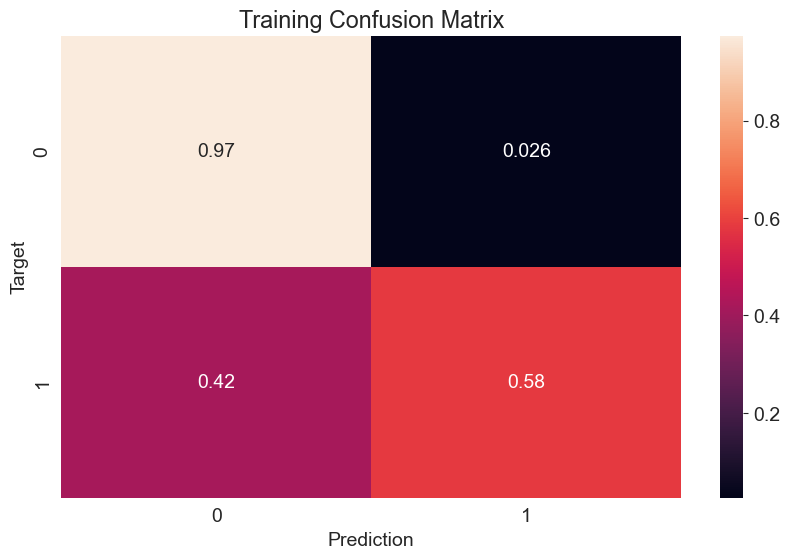

In [220]:
predict_and_plot(train_inputs,train_targets, 'Training')

Accuracy: 74.62%


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

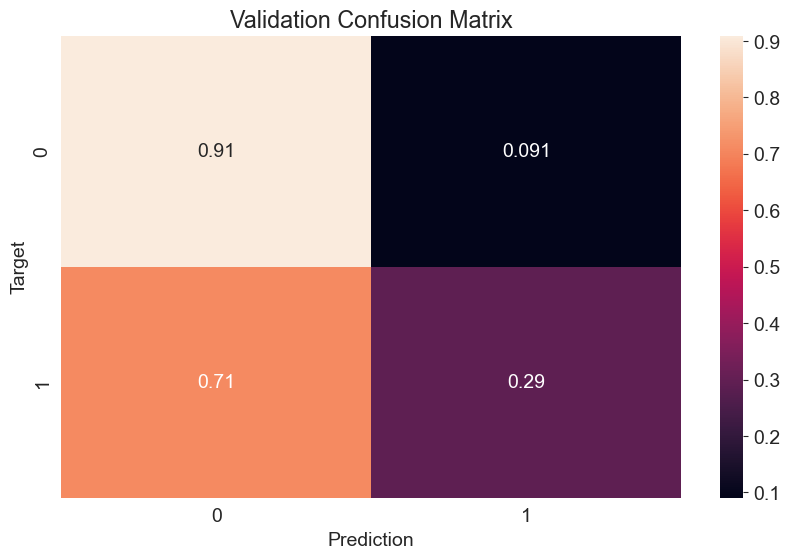

In [221]:
predict_and_plot(val_inputs, val_targets, 'Validation')

In [222]:
val_inputs.head(1)

,latitude,longitude,width,height,size
7497,0.111111,-0.376068,-1.51,1.227642,0.372093


In [223]:
new_data = val_inputs.to_numpy()

In [224]:
new = new_data[1].reshape(1,-1)

In [225]:
# def pred_new(data):
#     val = model3.predict(data)
#     if val < 1:
#         return 'No'
#     else:
#         return 'Yes'

In [226]:
# pred_new(new)

In [227]:
import pickle

In [228]:
pickle.dump(model3,open('classmodel.pkl', 'wb'))

In [229]:
pickled = pickle.load(open('classmodel.pkl','rb'))